<p style="font-size: 16pt;">
The IPython Notebook is a front-end to the IPython interpreter that is meant to be a modern scientific notebook.
</p>

You can

- write __rich__ _formatted_ `notes`
- display equations and derivations $\alpha^2 = 15x$, 
- embed plots, images, and video, etc.
- then share it or render it into Latex, HTML, or a number of other output formats. 

It's a great place for data exploration and logging your research progress. Let's learn about some of the features in detail.

---

I'm partial to the Anaconda python distribution:

https://www.continuum.io/downloads

It's very flexible, allowing for multiple environments (e.g, maintaining both Python 2.7 and  Python 3.0 environments), and has a great interface for downloading additional packages like `Astropy`.

---

## Cells

The front-end relies on __cells__, which are just text boxes that can be designated as _text_ or _code_. To edit a cell, you just double click on the text for that cell. To create a new cell, use the `Insert` menu at the top of the page to insert a cell above or below the currently selected cell.

You can change the cell type using the drop-down menu to the left of the words `Cell Toolbar` in the icon bar above. The cell type can be __Code__, __Markdown__, __Raw Text__, or a heading.

### Code Cells

Code cells allow you to write and execute Python code in blocks. This is a bit nicer than the standard interpreter, where you have to do it line-by-line. This is especially helpful when you have to re-run some code -- you can just re-run the whole cell, instead of running each line independently. To run the code, use:

* Shift + Enter : Runs cell and moved to next cell
* Ctrl + Enter : Runs cell, stays in cell

In the backend, code cells use the IPython interpreter, and thus have useful "magic" functions, tab complete, and extra help features.

In [1]:
8*11 + 16

104

In [2]:
print "spam"*10

spamspamspamspamspamspamspamspamspamspam


All the fancy python stuff is available too.

In [3]:
ls

M51.fits                      bouya_python_intro.ipynb
aegis_3dhst.v4.1.5.zbest.dat  nsa.fits


In [4]:
int?

In [5]:
%timeit range(100)

1000000 loops, best of 3: 992 ns per loop


### Markdown cells

Markdown is a human-readable markup format, similar to HTML but much more user-friendly. Markdown cells allow rich text formatting but will also display plain-text as expected.

Markdown basics: lists, markup and code

* list item 
* list item
  * nested list item


* _italics_
* __bold__
* `fixed-width font`

Code examples:

    def hello_ipython():
        print "Hello IPython!"

I can also render equations __in-line__ by enclosing latex in \$'s:

$\alpha * \beta + \gamma^3$

$\int^6_0 x^2 dx$

---

### Rich media

You can include images and video, and even write HTML directly in the notebook:

In [6]:
from IPython.display import Image
Image(url='https://pbs.twimg.com/profile_images/424484505915621376/EOwsjaMZ_400x400.png', width=300)

In [7]:
from IPython.display import HTML
HTML("<span style='font-family: \"Comic Sans MS\", cursive, sans-serif; font-size: 24pt;'>"
     "Comic sans is BAD"
     "</span>")

---

### Misc

* To save a notebook, use __Cmd + s__ (mac) or __Ctrl + s__ (other). For now, you can use the toolbar above to add new cells, and change the type, but there are keyboard bindings for most commands. To see what key-bindings are available, do __Ctrl + m__, __h__.

---

<p style="font-size: 16pt;">
Python for Astronomy: the workhorse packages
</p>

## Numpy

Conventionally, we import numpy as:

In [8]:
import numpy as np

### Getting help

In [9]:
np.lookfor('evenly spaced numbers')

Search results for 'evenly spaced numbers'
------------------------------------------
numpy.linspace
    Return evenly spaced numbers over a specified interval.
numpy.logspace
    Return numbers spaced evenly on a log scale.
numpy.arange
    Return evenly spaced values within a given interval.
numpy.ma.arange
    Return evenly spaced values within a given interval.


In [10]:
np.linspace?

In [11]:
np.arc*?

---

### Why?

Python's collections (e.g. `list`) can be heterogeneous -- e.g., can contain objects of different types:

In [12]:
[1, "cat", 15.13451, [1,2,3]]

[1, 'cat', 15.13451, [1, 2, 3]]

This is very convenient for many applications, but means there is a lot of overhead if you simply have a list of numbers and want to, for example, compute the same operation on all elements. The main feature of Numpy is to offer an array object that represents a contiguous block in memory. This is more like arrays from C or other languages. Arrays most commonly share a common data type over all elements (e.g., integer), but certain kinds of arrays may have mixed types. For homogeneous arrays, Python doesn't have to infer the datatype of every element -- for this and many other more detailed reasons, numerical operations with arrays are generally __much__ more efficient than on lists:

In [13]:
np.array([1,2,3,4,5,6])

array([1, 2, 3, 4, 5, 6])

---

## The ndarray object

Numpy arrays are created by passing an iterable (like a Python `list`) to the numpy `array()` function

In [14]:
some_array = np.array([1,2,3,4])

In [15]:
some_array

array([1, 2, 3, 4])

The above statement infers that the datatype is an integer because all of the elements are integers. We could enforce this by specifying a datatype

In [16]:
np.array([1,2,3,4,5,6], dtype=int)

array([1, 2, 3, 4, 5, 6])

In [17]:
np.array([1,2,3,4,5,6], dtype=float)

array([ 1.,  2.,  3.,  4.,  5.,  6.])

In [18]:
np.array([1, 2, 4.], dtype=np.float128)

array([ 1.0,  2.0,  4.0], dtype=float128)

Complex (in a mathematical sense) data types are supported:

In [19]:
a = np.array([1 + 6j, 2.3 - 11j])
a.dtype

dtype('complex128')

Numpy arrays can have an arbitrary number of dimensions. For example, we could create a 2D array by passing in a list of lists:

In [20]:
arr = np.array([[1,2], [3,4]])
arr

array([[1, 2],
       [3, 4]])

Some useful attributes for prying in to arrays:

In [21]:
arr.ndim # number of dimensions

2

In [22]:
arr.shape # length along each dimension

(2, 2)

In [23]:
arr.size # total number of elements

4

What about a 3 by 3 array?

$$\left(
    \begin{array}{c} 
    1 & 2 & 3\\\\
    4 & 5 & 6\\\\
    7 & 8 & 9
    \end{array} 
\right)
$$

In [24]:
arr = np.array([[1,2,3],
                [4,5,6],
                [7,8,9]])
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [25]:
arr.ndim,arr.shape,arr.size

(2, (3, 3), 9)

A quick note: in Numpy terminology, dimensions are called `axes` -- so, the 2nd dimension is `axis=1`

---

## Creating arrays

There are a number of useful convenience functions for creating arrays with various properties. For example, Numpy provides an array version of Python's built-in `range()` function called `arange()`

In [26]:
np.arange(5) # create numbers from 0 up to but not including 5

array([0, 1, 2, 3, 4])

The bonus to using `arange()` is that you can specify a float step:

In [27]:
np.arange(0, 10+0.25, 0.25) # create an array of numbers from 0 up to but not including 10 with a spacing of 0.25

array([  0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,   1.5 ,   1.75,
         2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,   3.5 ,   3.75,
         4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,   5.75,
         6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,
         8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75,  10.  ])

_It's good to remember that arange creates elements up to but not including the `end` value (10 above)_

Another useful one to remember is `linspace()`, which generates uniformly spaced values between the start and end value. For example, 11 evenly spaced values from 0 to 1:

In [28]:
np.linspace(0, 1, 11) # 11 evenly spaced numbers between 0 and 1

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

Yes, confusingly `linspace()` _includes_ the final value...

Another two that I use most frequently are `zeros()` and `ones()`, which generate arrays full of zeros or ones given a specified shape. For example, to create a 4 by 4 by 3 array of zeros:

In [29]:
arr = np.zeros((4,4,3))
arr.shape

(4, 4, 3)

If you need integer values, you can specify a data type with the `dtype` argument:

In [30]:
arr = np.zeros((4,4,3), dtype=int)
arr.dtype

dtype('int64')

The same holds for `ones()`:

In [31]:
arr = np.ones((4,4,3), dtype=float)
print(arr.shape, arr.dtype)

((4, 4, 3), dtype('float64'))


Both `zeros()` and `ones()` are useful for creating placeholder arrays that you will later fill with data, however, 0 and 1 are valid numbers! If your code doesn't check that you filled the array successfully, then your code might not fail where you expect it to and strange things can happen. In numpy, there is a special number called NaN, which stands for "not a number." Any numerical operations with NaN will produce a new NaN, which makes it obvious that something went wrong. For placeholder arrays, I often recommend adding NaN to the array so that it is full of invalid numbers:

In [32]:
np.zeros(shape=(3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [33]:
placeholder = np.zeros([3,3]) + np.nan
placeholder

array([[ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan]])

In [34]:
placeholder * 4.

array([[ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan]])

---

## Random numbers

Numpy provides a subpackage, `np.random`, for generating (pseudo)random numbers. There are many useful functions for sampling from distributions:

In [35]:
np.random.uniform(0, 2*np.pi, size=(5,5)) # make a 5x5 array of numbers uniformly sampled between 0 and 2π

array([[ 0.62988853,  1.2544191 ,  3.80604458,  2.14679754,  5.23027583],
       [ 1.202197  ,  3.59880435,  4.19129281,  3.54580118,  2.3443823 ],
       [ 6.03760164,  4.23392884,  1.29455317,  3.13939331,  4.17810535],
       [ 0.42801878,  5.28600845,  1.05600678,  4.7097796 ,  2.61639069],
       [ 1.1270825 ,  5.30120057,  1.70172132,  2.19955984,  2.65629644]])

In [36]:
np.set_printoptions(precision=3)

In [37]:
arr = np.random.normal(0., 0.5, size=4) # make a length 4 array of numbers sampled from a gaussian with sigma = 0.5 
arr

array([-0.373,  0.258, -0.038,  0.045])

---

## Array operations and differences with lists

Array options act __element-wise__, unlike how `list`s behave. For example, multiplying a `list` by an integer will return a new list with the original replicated that many times. Multiplying an array of numbers by a scalar behaves like vector multiplication.

Again, multiplying a list by an integer, `n`, produces a new list with `n` copies of the original list:

In [38]:
print([1, 2]*5)

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2]


Multiplying an array by a number acts element-wise:

In [39]:
np.array([1, 2]) * 5

array([ 5, 10])

$5 \times \left(\begin{array}{c} 1\\\ 2 \end{array} \right) = \left(\begin{array}{c} 5\\\ 10 \end{array} \right)$

Adding two lists will concatenate the two into a new list:

In [40]:
[1,2] + [3,4]

[1, 2, 3, 4]

Adding two arrays is like adding two vectors:

$\left(\begin{array}{c} 1\\\ 2 \end{array} \right) + \left(\begin{array}{c} 3\\\ 4 \end{array} \right) = \left(\begin{array}{c} 4\\\ 6 \end{array} \right)$

In [41]:
np.array([1,2]) + np.array([3,4])

array([4, 6])

There are numpy functions to get an array to act like a list!

In [42]:
np.append(np.array([1,2]),np.array([1,2]))

array([1, 2, 1, 2])

In [43]:
np.column_stack(((1,2),(3,4)))

array([[1, 3],
       [2, 4]])

Numpy works for comparison operators as well. For example, when comparing an array of numbers with another, you will get a new array of boolean values of the same shape as the original. 

$\left(\begin{array}{c} 1\\2 \\3 \\4 \\5 \end{array} \right) > 3 = \left(\begin{array}{c} False\\False \\False \\True\\True \end{array} \right)$

In [44]:
5 > 3

True

In [45]:
np.array([1,2,3,4,5]) > 3

array([False, False, False,  True,  True], dtype=bool)

---

## Reshaping, slicing, and indexing

Arrays with a given shape can be _reshaped_, as long as the total number of elements is conserved. For example, a 1D array of length 100 can be reshaped into a 10 x 10 2D array:

In [46]:
np.arange(100).reshape(10,10)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

We can also _flatten_ a multi-dimensional array with `ravel()`:

In [47]:
arr = np.random.random(size=(4,7,2))
arr.shape

(4, 7, 2)

In [48]:
arr2 = arr.ravel()
arr2.shape

(56,)

Arrays support slicing and indexing just like Python lists

In [49]:
arr = np.arange(10)
arr[3:]

array([3, 4, 5, 6, 7, 8, 9])

The main difference is that arrays can be multi-dimensional, so you can specify indices or slices along multiple dimensions by separating the indices or slices with a comma. To see this, let's first create a 10 by 10 array of numbers from 0 to 99:

In [50]:
arr = np.arange(100).reshape(10,10)
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

We can select a single element from this 2D array by specifying two indices:

In [51]:
arr[3,5]

35

We can also use slicing to select a sub-rectangle from this array by specifying slices along the two dimensions:

In [52]:
arr[1:5,3:5]

array([[13, 14],
       [23, 24],
       [33, 34],
       [43, 44]])

---

# Intro to Matplotlib

In [53]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')



## Introduction

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

    Easy to get started
    Support for LATEX formatted labels and texts
    Great control of every element in a figure, including figure size and DPI.
    High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
    GUI for interactively exploring figures but also supports figure generation without the GUI.


More information at the Matplotlib web page: http://matplotlib.org/

Other resources: 

    * This talk is based on a notebook by J.R. Johannson: http://jrjohansson.github.io/
    * http://stackoverflow.com/ : Stack Overflow is your friend!
    * http://matplotlib.org/gallery.html - A large gallery showcaseing types of plots matplotlib can create. 
    * https://github.com/WeatherGod/AnatomyOfMatplotlib : anathomy of matplotlib tutorial
    
To get started using Matplotlib in a Python program, either include the symbols from the pylab module (the easy way):


In [54]:
import matplotlib
import matplotlib.pyplot as plt

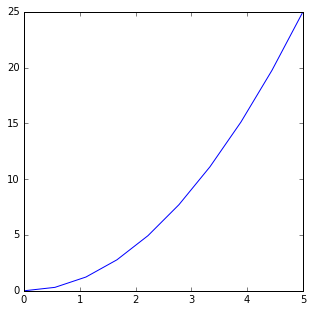

In [55]:
x = np.linspace(0, 5, 10)
y = x**2

plt.figure(figsize=(5,5))
plt.plot(x, y)

## Colors, linewidths, linetypes


**Colors**

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways:

'b' means blue, 'g' means green, 'b.-' means a blue line with dots.


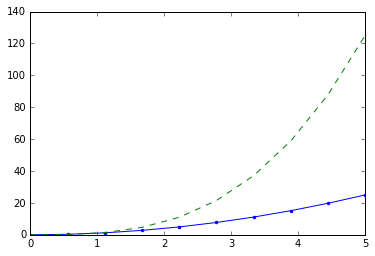

In [56]:
plt.plot(x, x**2, 'b.-') # blue line with dots
plt.plot(x, x**3, 'g--') # green dashed line

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the color and alpha keyword arguments. For selecting good color combinations, try the following:

    - http://colorbrewer2.org/
    - http://paletton.com
    - http://coolors.co/

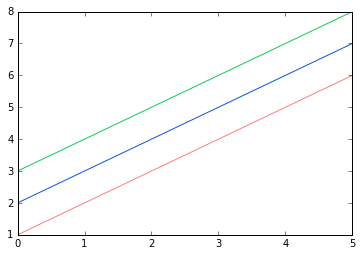

In [57]:
plt.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
plt.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
plt.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color


You can create **lots** of different style and color combinations to suit your preference!

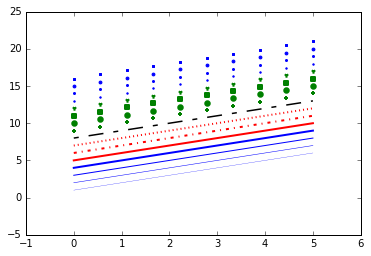

In [58]:
plt.plot(x, x+1, color="blue", linewidth=0.25)
plt.plot(x, x+2, color="blue", linewidth=0.50)
plt.plot(x, x+3, color="blue", linewidth=1.00)
plt.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
plt.plot(x, x+5, color="red", lw=2, linestyle='-')
plt.plot(x, x+6, color="red", lw=2, ls='-.')
plt.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = plt.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
plt.scatter(x, x+ 9, color="green", lw=2,  marker='+')
plt.scatter(x, x+10, color="green", lw=2,  marker='o')
plt.scatter(x, x+11, color="green", lw=2, marker='s')
plt.scatter(x, x+12, color="green", lw=2,  marker='1')

# marker size and color
plt.scatter(x, x+13, color="blue", lw=1, marker='o', s=2)
plt.scatter(x, x+14, color="blue", lw=1, marker='o', s=4)
plt.scatter(x, x+15, color="blue", lw=1, marker='o', s=8)
plt.scatter(x, x+16, color="blue", lw=1, marker='s', s=8)

## Titles, labels, legends, text

Now let's look at how decorate a figure with titles, axis labels, and legends.

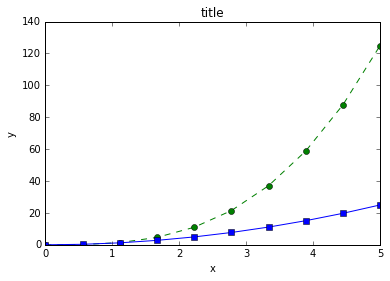

In [59]:
plt.plot(x, x**3, 'g--',marker='o')
plt.plot(x, x**2, 'b-',marker='s')
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')

** Legend**

You can define all the elements of the legend by hand, but a more robust way is to use the label='label text' keyword argument when nex objects are added to the figure. The advantage is that if the figure changes, the legend will be automatically updated. 

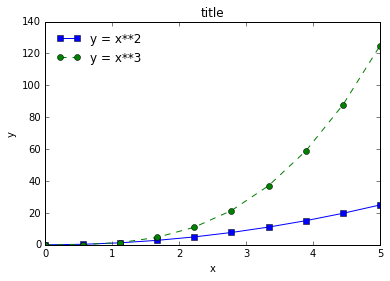

In [60]:
fig, ax = plt.subplots()

ax.plot(x, x**2, 'b-',marker='s', label="y = x**2")
ax.plot(x, x**3,'g--',marker='o', label="y = x**3")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')
ax.legend(loc=2, frameon=False) # upper left corner
#ax.legend(loc=0) # let matplotlib decide the optimal location
#ax.legend(loc=1) # upper right corner
#ax.legend(loc=2) # upper left corner
#ax.legend(loc=3) # lower left corner
#ax.legend(loc=4) # lower right corner
# .. many more options are available


** Formatting Text: Latex, fontsize, font family **

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, "$y=x^3$".

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example \alpha to produce the symbol α. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an 'r', like r"\alpha" or r'\alpha' instead of "\alpha" or '\alpha':

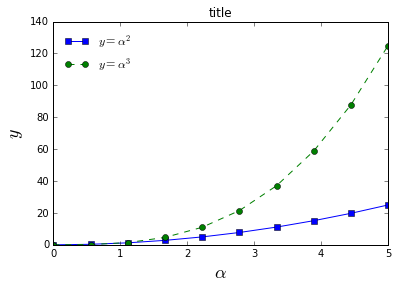

In [61]:
fig, ax = plt.subplots()

ax.plot(x, x**2, 'b-',marker='s', label=r"$y = \alpha^2$")
ax.plot(x, x**3, 'g--',marker='o', label=r"$y = \alpha^3$")
ax.legend(loc=2, frameon=False) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title')


We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [62]:
from matplotlib import rc
font = {'family':'serif','size':14}
rc('font',**font)

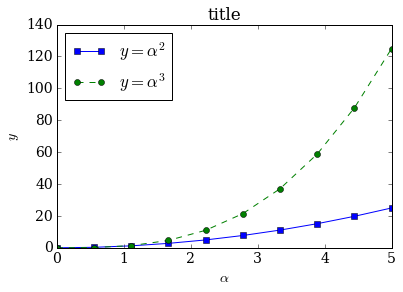

In [63]:
fig, ax = plt.subplots()

ax.plot(x, x**2, 'b-',marker='s', label=r"$y = \alpha^2$")
ax.plot(x, x**3, 'g--',marker='o', label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

In [64]:
# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

** Text Annotations **

Annotating text in matplotlib figures can be done using the text function. It supports LaTeX formatting just like axis label texts and titles:

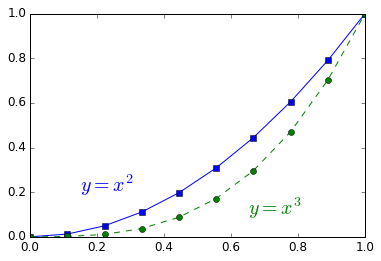

In [65]:
fig, ax = plt.subplots()

xx = np.linspace(0., 1., 10)

ax.plot(xx, xx**2, 'b-',marker='s', label=r"$y = \alpha^2$")
ax.plot(xx, xx**3, 'g--',marker='o', label=r"$y = \alpha^3$")

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");


** Saving a Figure **

To save a figure to a file we can use the `savefig` method in the `Figure` class. Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, I recommend using PDF whenever possible. (LaTeX documents compiled with pdflatex can include PDFs using the includegraphics command). In some cases, PGF can also be good alternative.

In [66]:
fig.savefig("filename.png")
fig.savefig("filename.png", dpi=200)
fig.savefig("filename.pdf")

---

## Axes related stuff 

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

** Plot Range **

First things first, let's configure the axes range.

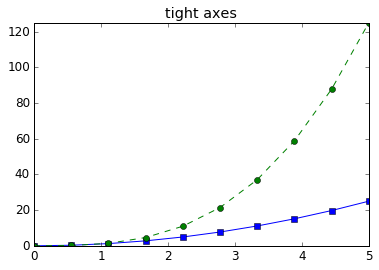

In [67]:
### Three ways to define axes ranges
fig, ax = plt.subplots()

ax.plot(x, x**2, 'b-',marker='s', label=r"$y = \alpha^2$")
ax.plot(x, x**3, 'g--',marker='o', label=r"$y = \alpha^3$")
ax.set_title("default axes ranges")

ax.axis('tight')
ax.set_title("tight axes")

#ax.set_title("custom axes range");
#ax.set_ylim([0, 60])
#ax.set_xlim([2, 5])




** Logarithmic scale **

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using set_xscale and set_yscale methods which accept one parameter (with the value "log" in this case):


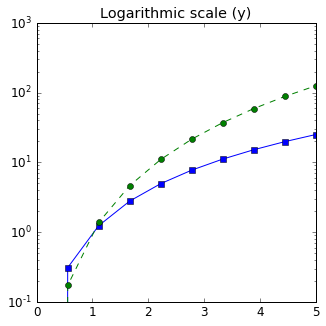

In [68]:
fig, ax = plt.subplots(figsize=(5,5))
      
#ax.plot(x, x**2, x, exp(x))
#ax.set_title("Normal scale")

ax.plot(x, x**2, 'b-',marker='s', label=r"$y = \alpha^2$")
ax.plot(x, x**3, 'g--',marker='o', label=r"$y = \alpha^3$")
ax.set_yscale("log")
ax.set_title("Logarithmic scale (y)");

** Placement of ticks and custom tick labels **

We can explicitly determine where we want the axis ticks with 
set_xticks and set_yticks, which both take a list of values for 
where on the axis the ticks are to be placed. We can also use the 
set_xticklabels and set_yticklabels methods to provide a list of 
custom text labels for each tick location:


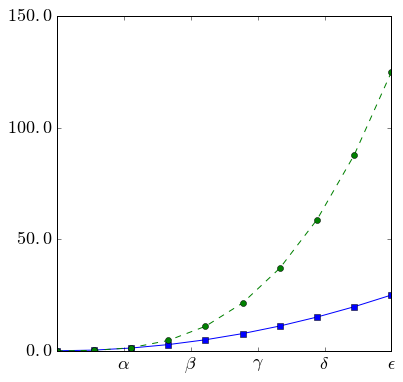

In [69]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(x, x**2, 'b-',marker='s', label=r"$y = \alpha^2$")
ax.plot(x, x**3, 'g--',marker='o', label=r"$y = \alpha^3$")

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels


There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.


** Scientific notation **

With large numbers on axes, it is often better use scientific notation:


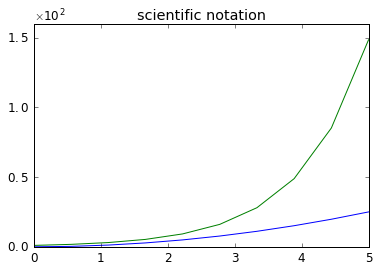

In [70]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 


You also have control over the distance of the labels from the axis:

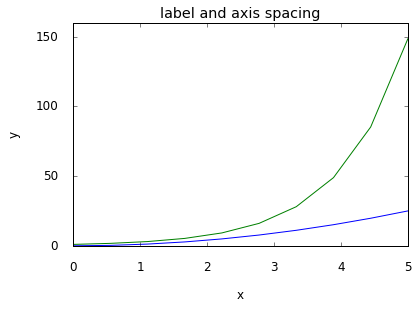

In [71]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 15
matplotlib.rcParams['ytick.major.pad'] = 15

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15

ax.set_xlabel("x")
ax.set_ylabel("y");


In [72]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

** Axis grid **

With the grid method in the axis object, we can turn on and off grid lines. Neat, but don't overdo it. We can also customize the appearance of the grid lines using the same keyword arguments as the plot function:


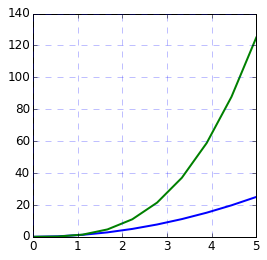

In [73]:
fig, ax = plt.subplots(figsize=(4,4))

# custom grid appearance
ax.plot(x, x**2, x, x**3, lw=2)
ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

** Axis spines **

We can also change the properties of axis spines:

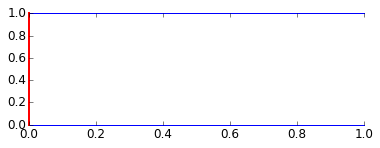

In [74]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

** Twin axes **

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the twinx and twiny functions:


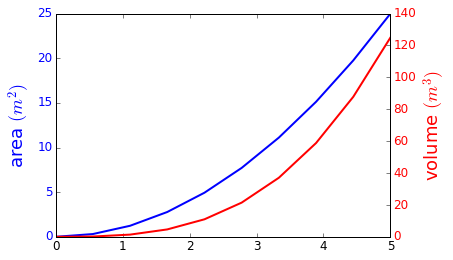

In [75]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

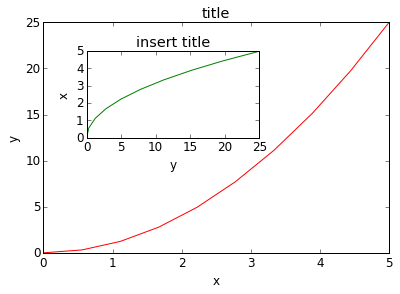

In [76]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, x**2, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(x**2, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

---

### Errorbars 

Matplotlib also provides an easy way to make plots with error bars, using the errorbar() function. This, again, is called like plot(), but accepts arrays of y or x error data.

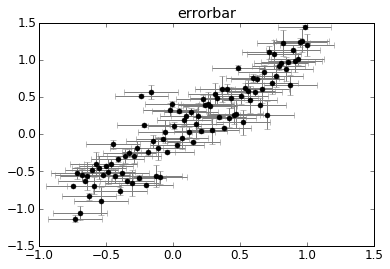

In [77]:
fig, ax = plt.subplots()

xx = np.linspace(-0.75, 1., 100)
yy = xx + 0.25*np.random.normal(size=len(xx))
sigma_y = np.random.uniform(0,0.2, len(xx))
ax.errorbar(xx, yy, yerr=sigma_y, xerr=0.2, 
         linestyle="none", marker="o", markerfacecolor="k", 
         markersize=5, ecolor="grey", capsize=3)
ax.set_title("errorbar")


## Histograms

Making histograms is done with the `hist()` function, and is used much like the `plot()` function but instead accepts a single data set:

(array([   2.,   13.,   38.,   91.,  182.,  225.,  214.,  141.,   74.,   20.]),
 array([-12.919, -10.531,  -8.143,  -5.755,  -3.367,  -0.98 ,   1.408,
          3.796,   6.184,   8.572,  10.96 ]),
 <a list of 10 Patch objects>)

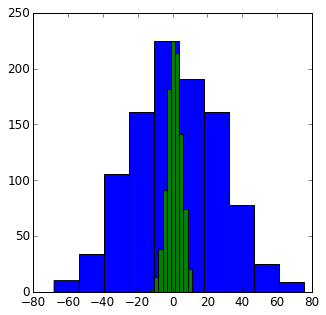

In [78]:
plt.figure(figsize=(5,5))
data1 = np.random.normal(1., 25., 1000)
data2 = np.random.normal(1., 4., 1000)
plt.hist(data1)
plt.hist(data2)

(array([   1.,    1.,    1.,    2.,    3.,    4.,    5.,    6.,    9.,
          13.,   16.,   23.,   29.,   34.,   41.,   45.,   54.,   65.,
          73.,   79.,   89.,   92.,   94.,   99.,  100.]),
 array([-11.631, -10.837, -10.043,  -9.249,  -8.455,  -7.661,  -6.868,
         -6.074,  -5.28 ,  -4.486,  -3.692,  -2.899,  -2.105,  -1.311,
         -0.517,   0.277,   1.071,   1.864,   2.658,   3.452,   4.246,
          5.04 ,   5.834,   6.627,   7.421,   8.215]),
 <a list of 1 Patch objects>)

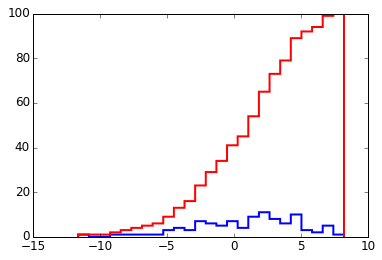

In [79]:
data = np.random.normal(1., 4., 100)
plt.hist(data, bins=25, histtype="step", color="blue", linewidth=2)
plt.hist(data, bins=25, histtype="step", cumulative=True, color="red", linewidth=2)

---

## Displaying Images

Matplotlib can also be used to visualize image data, using the imshow() function. Let's open the M51 FITS file from the Pyfits demo:

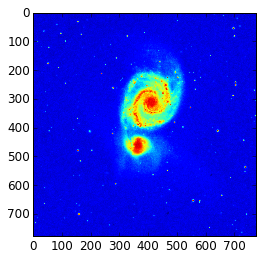

In [80]:
from astropy.io import fits
hdulist = fits.open("M51.fits")
image_data = hdulist[0].data
plt.imshow(image_data)

Well, that kind of looks like a galaxy...To make it look a bit nicer, let's change the pixel interpolation scheme, change the colormap, and make it a bit larger. For a full list of color maps, look here:
http://matplotlib.org/examples/color/colormaps_reference.html

(Also relevant, why jet is a bad colormap: https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/)

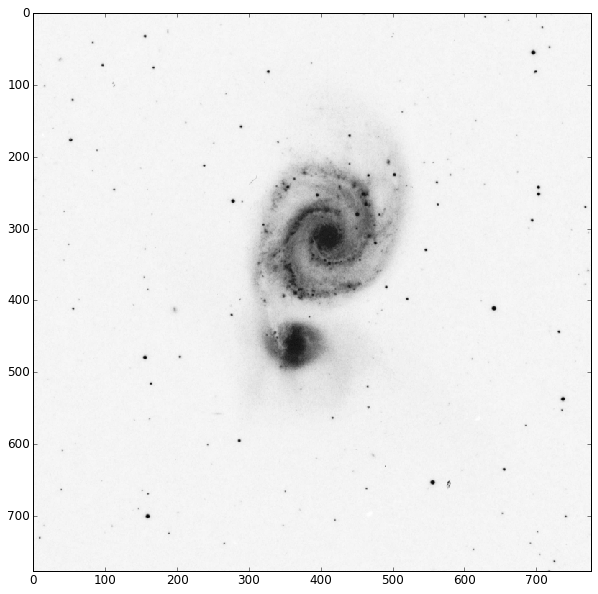

In [81]:
plt.figure(figsize=(10,10))
plt.imshow(image_data, interpolation="nearest", cmap=plt.cm.Greys)

That's almost there -- now let's scale the data using a square-root function, and reverse the colormap (`Greys` -> `Greys_r`)

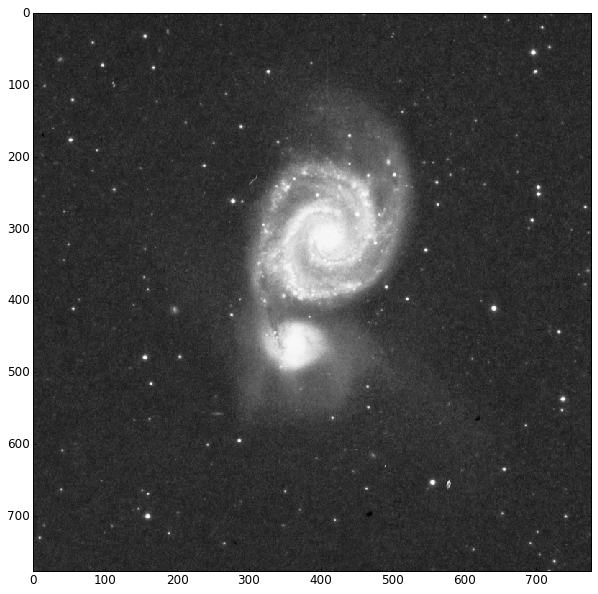

In [82]:
plt.figure(figsize=(10,10))
plt.imshow(np.sqrt(image_data), interpolation="nearest", cmap=plt.cm.Greys_r)

---

## Astropy: fits images and tables

We just looked at a `fits` image above, the way you might in DS9. But `fits` files are also often used as tables, easily storing extremely large catalogs.

Like, for instance, the Nasa-Sloan Digital Atlas catalog.

In [83]:
hdu = fits.open('nsa.fits')

Let's look at what this fits table contains:

In [84]:
hdu.info()

Filename: nsa.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1                BinTableHDU    395   55552R x 184C   [J, 19A, 27A, D, D, J, J, J, J, J, J, E, E, 7A, E, I, B, I, 3A, E, E, E, E, E, J, 7E, 7E, I, 7E, 7E, 7E, 7E, 7E, 5E, 7E, E, E, E, E, D, D, 7E, 105E, 105E, 105E, 105E, 105E, 105E, 7E, 7E, 7E, 7E, E, E, E, E, 7E, 7E, E, E, E, 7E, 7E, 7J, J, J, 8A, 15E, E, E, E, E, J, J, J, J, 7E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, D, D, E, 6A, 23A, 8A, J, D, D, E, J, E, E, E, J, E, E, E, E, 7E, J, 19A, 33A, J, 20J, 200A, E, E, E, E, E, E, E, E, E, E, E, E, E, 8A, E, E, E, D, D, J, E, E, E]   


The actual data is stored in the `BinTableHDU`. There are 55,552 objects, and 184 columns. That's a lot of data to handle. Luckily, we can learn exactly what sort of data we're looking at very easily.

In [85]:
nsa_dat = hdu[1].data

In [86]:
nsa_dat.shape

(55552,)

In [87]:
nsa_dat.dtype.names

('INDX',
 'IAUNAME',
 'SUBDIR',
 'RA',
 'DEC',
 'ISDSS',
 'INED',
 'ISIXDF',
 'IALFALFA',
 'IZCAT',
 'ITWODF',
 'MAG',
 'Z',
 'ZSRC',
 'SIZE',
 'RUN',
 'CAMCOL',
 'FIELD',
 'RERUN',
 'XPOS',
 'YPOS',
 'ZLG',
 'ZDIST',
 'ZDIST_ERR',
 'NSAID',
 'NMGY',
 'NMGY_IVAR',
 'OK',
 'RNMGY',
 'ABSMAG',
 'AMIVAR',
 'EXTINCTION',
 'KCORRECT',
 'KCOEFF',
 'MTOL',
 'B300',
 'B1000',
 'METS',
 'MASS',
 'XCEN',
 'YCEN',
 'NPROF',
 'PROFMEAN',
 'PROFMEAN_IVAR',
 'QSTOKES',
 'USTOKES',
 'BASTOKES',
 'PHISTOKES',
 'PETROFLUX',
 'PETROFLUX_IVAR',
 'FIBERFLUX',
 'FIBERFLUX_IVAR',
 'BA50',
 'PHI50',
 'BA90',
 'PHI90',
 'SERSICFLUX',
 'SERSICFLUX_IVAR',
 'SERSIC_N',
 'SERSIC_BA',
 'SERSIC_PHI',
 'ASYMMETRY',
 'CLUMPY',
 'DFLAGS',
 'AID',
 'PID',
 'DVERSION',
 'PROFTHETA',
 'PETROTHETA',
 'PETROTH50',
 'PETROTH90',
 'SERSIC_TH50',
 'OBJNO',
 'PLATE',
 'FIBERID',
 'MJD',
 'COEFF',
 'VDISP',
 'D4000',
 'D4000ERR',
 'FA',
 'FAERR',
 'S2FLUX',
 'S2FLUXERR',
 'S2EW',
 'S2EWERR',
 'S2VMEAS',
 'S2VMERR',
 'S2RATIO',


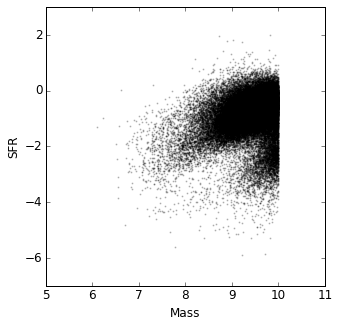

In [88]:
plt.figure(figsize=(5,5))
plt.scatter(nsa_dat['MASS'],np.log10(nsa_dat['HALPHA_SFR']),s=1,alpha=0.2,c='k')
plt.xlabel('Mass')
plt.ylabel('SFR')

What if we want to look at only some of this dataset?

In [89]:
nsa_dat[nsa_dat['MASS'] < 9].shape

(9449,)

We can also colorcode the data based on a third parameter. In this case, rather than a string or a hexadecimal color, we can simply set the color to a third array of equal length to our x and y arrays.

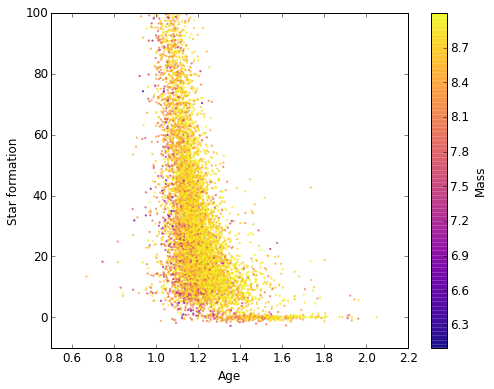

In [90]:
fig,ax = plt.subplots(figsize=(8,6))
sc = plt.scatter(nsa_dat['D4000'][nsa_dat['MASS'] < 9],
                 nsa_dat['HAEW'][nsa_dat['MASS'] < 9],
                 c=nsa_dat['MASS'][nsa_dat['MASS'] < 9],
                 cmap=plt.cm.plasma,lw=0,zorder=2,s=5,alpha=0.8)
ax.set_xlabel('Age')
ax.set_ylabel('Star formation')
ax.set_xlim(0.5,2.2)
ax.set_ylim(-10,100)
plt.colorbar(sc,label='Mass')

---

## Miscellaneous useful stuff

use `genfromtxt` to import catalogues that are in plaintxt, ascii, etc., while still preserving header information and data type

In [91]:
aegis_cat = np.genfromtxt('aegis_3dhst.v4.1.5.zbest.dat',names=True,dtype=None)

In [92]:
aegis_cat[0]

('aegis', 1, 0, 0, 0, -1.0, -1.0, -1.0, -1.0, -1.0)

In [93]:
aegis_cat.dtype.names

('field',
 'phot_id',
 'z_best_s',
 'use_phot',
 'use_zgrism',
 'z_best',
 'z_best_l95',
 'z_best_l68',
 'z_best_u68',
 'z_best_u95')

Astropy also supports reading in ascii tables!

In [94]:
from astropy.io import ascii

In [95]:
tab = ascii.read('aegis_3dhst.v4.1.5.zbest.dat')

In [96]:
tab

field,phot_id,z_best_s,use_phot,use_zgrism,z_best,z_best_l95,z_best_l68,z_best_u68,z_best_u95
str5,int64,int64,int64,int64,float64,float64,float64,float64,float64
aegis,1,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0
aegis,2,3,0,0,0.01,0.01,0.011,0.024,0.025
aegis,3,3,1,0,0.2062,0.149,0.173,0.244,0.263
aegis,4,3,0,0,0.0355,0.011,0.015,0.057,0.067
aegis,5,3,0,0,0.3427,0.316,0.326,0.361,0.367
aegis,6,3,0,0,0.7217,0.666,0.692,0.751,0.776
aegis,7,3,0,0,0.0424,0.011,0.017,0.068,0.095
aegis,8,3,1,0,0.8557,0.099,0.666,1.113,1.33
aegis,9,3,1,0,0.1806,0.028,0.08,0.275,0.393


## Units

`astropy.units` is a powerful tool for data analysis 

In [97]:
from astropy import units as u

We can assign a unit to a quantity:

In [98]:
q = 42.0 * u.meter

In [99]:
q

<Quantity 42.0 m>

In [100]:
q.value, q.unit

(42.0, Unit("m"))

Converting between units:

In [101]:
x = 1.0 * u.parsec

In [102]:
x.to(u.km) 

<Quantity 30856775814671.914 km>

For more information: http://docs.astropy.org/en/stable/units/